## 데이터 전처리
- 제목에 직군 이름이 들어간 경우만 추출
- 정규직, 인턴, 계약직, 프리랜서 타입만 추출
- 날짜 제거
- 중복 제거
- 서울, 충청도, 강원도 처럼 도 이름만 추출

In [1]:
import pandas as pd

In [6]:
df = pd.read_csv('crawling_job_all.csv')
df[20:25]

,company,title,url,exp,edu,typ,loc,date,job_name
20,㈜뉴엔에이아이,[신입 / 경력] 소셜 빅데이터 분석 컨설턴트(데이터 사이언티스트) 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입·경력3년↑,초대졸↑,정규직 외,경기 고양시,D-51,데이터 분석
21,㈔한국기술사업화진흥협회,제조기업 기반 빅데이터 분석 실무 교육생 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,연수생/교육생,대구 달서구,D-18,데이터 분석
22,㈜포이시스,[본사] Dashboard 구현을 위한 Tableau 시각화 & 데이터 분석 경력직 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,대졸↑,정규직,서울 금천구,D-24,데이터 분석
23,㈜와이씨,YC-EXICON-SEMCNS GROUP 2024년도 하반기 신입사원 공개채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입,대졸↑,정규직,경기 성남시 외,D-8,데이터 분석
24,(주)경농,경농 및 계열사 2025년 신입사원 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입,대졸↑,정규직,경기,D-10,데이터 분석


#### 직업 타입

In [7]:
job_type = ['정규직', '인턴', '계약직', '프리랜서']

In [8]:
df_type = df[df['typ'].str.contains('|'.join(job_type))]
df_type[20:25]

,company,title,url,exp,edu,typ,loc,date,job_name
20,㈜뉴엔에이아이,[신입 / 경력] 소셜 빅데이터 분석 컨설턴트(데이터 사이언티스트) 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입·경력3년↑,초대졸↑,정규직 외,경기 고양시,D-51,데이터 분석
22,㈜포이시스,[본사] Dashboard 구현을 위한 Tableau 시각화 & 데이터 분석 경력직 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,대졸↑,정규직,서울 금천구,D-24,데이터 분석
23,㈜와이씨,YC-EXICON-SEMCNS GROUP 2024년도 하반기 신입사원 공개채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입,대졸↑,정규직,경기 성남시 외,D-8,데이터 분석
24,(주)경농,경농 및 계열사 2025년 신입사원 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입,대졸↑,정규직,경기,D-10,데이터 분석
25,캐논코리아(주),2024년 12월 캐논코리아 정기신입사원(채용연계형인턴)모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입,대졸↑,인턴,서울 강남구 외,D-10,데이터 분석


#### 제목에 직군 이름이 들어간 경우만

In [9]:
df_lower = df_type.copy()

df_lower['title'] = df_lower['title'].str.lower()
df_lower.head(10)

,company,title,url,exp,edu,typ,loc,date,job_name
0,㈜인라이플,[주4.5일근무] 데이터 분석 및 기획자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력2년↑,학력무관,정규직,서울 구로구 외,상시채용,데이터 분석
1,패스트파이브㈜,데이터 분석 담당자,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,대졸↑,정규직,서울 강남구,D-22,데이터 분석
2,주식회사 빗썸,[빗썸] 비즈니스 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력7년↑,학력무관,정규직,서울 강남구,상시채용,데이터 분석
3,㈜컬리,[컬리] 온사이트 프로모션 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력,대졸↑,정규직,서울 강남구,D-21,데이터 분석
4,"㈜숲(SOOP CO., LTD.)",[soop] 데이터 분석 및 지표 설계,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,경기 성남시,D-3,데이터 분석
5,㈜테크랩스,마케팅 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력2년↑,대졸↑,정규직,서울 강남구,D-31,데이터 분석
6,콘센트릭스서비스코리아(유),ga/aa 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력1년↑,학력무관,정규직,서울 강남구,D-26,데이터 분석
7,㈜넥슨,[사업개발그룹] 데이터 분석 매니저,https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력3년↑,학력무관,정규직,경기 성남시,상시채용,데이터 분석
8,주식회사 빗썸,[빗썸] 고객 데이터 분석 담당자,https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력3년↑,학력무관,정규직,서울 강남구,상시채용,데이터 분석
9,트리플하이엠,[연구소] 온라인 마케팅 데이터 분석 및 설계 (경력),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력2년↑,대졸↑,정규직,서울 금천구,D-20,데이터 분석


In [10]:
def check_keywords(row, keywords):
    for keyword_group in keywords:
        if all(keyword in row for keyword in keyword_group):
            return True
    return False

In [11]:
da_with = [
    ['데이터', '분석'],    
    ['data', 'analyst'],  
    ['db', '분석'],      
    ['데이터', '애널리스트'],
    ['buisness', 'analyst'],
    ['analyst'],   
    ['분석'],     
    ['데이터 분석'], 
    ['data analyst'] 
]

In [12]:
filt = df_lower[df_lower['job_name'] == '데이터 분석']

da = filt[filt['title'].apply(lambda x: check_keywords(x, da_with))]
da.head()

,company,title,url,exp,edu,typ,loc,date,job_name
0,㈜인라이플,[주4.5일근무] 데이터 분석 및 기획자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력2년↑,학력무관,정규직,서울 구로구 외,상시채용,데이터 분석
1,패스트파이브㈜,데이터 분석 담당자,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,대졸↑,정규직,서울 강남구,D-22,데이터 분석
2,주식회사 빗썸,[빗썸] 비즈니스 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력7년↑,학력무관,정규직,서울 강남구,상시채용,데이터 분석
3,㈜컬리,[컬리] 온사이트 프로모션 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력,대졸↑,정규직,서울 강남구,D-21,데이터 분석
4,"㈜숲(SOOP CO., LTD.)",[soop] 데이터 분석 및 지표 설계,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,경기 성남시,D-3,데이터 분석


In [13]:
de_with = [
    ['데이터', '엔지니어'],    
    ['data', 'engineer'],  
    ['db', '엔지니어'],      
    ['db', 'engineer']
]

In [14]:
filt = df_lower[df_lower['job_name'] == '데이터 엔지니어']

de = filt[filt['title'].apply(lambda x: check_keywords(x, de_with))]
de.head()

,company,title,url,exp,edu,typ,loc,date,job_name
59,현대엘리베이터,데이터 엔지니어 경력 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력,대졸↑,정규직,서울 종로구,D-10,데이터 엔지니어
60,㈜이노케어플러스,데이터 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,서울 서초구,D-59,데이터 엔지니어
61,㈜이스트에이드,데이터 엔지니어 시니어,https://www.jobkorea.co.kr/Recruit/GI_Read/458...,경력4년↑,학력무관,정규직,서울 서초구,D-32,데이터 엔지니어
62,㈜넥슨,[기술본부] 데이터최적화팀 데이터 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/456...,경력3년↑,학력무관,정규직,경기 성남시,상시채용,데이터 엔지니어
63,㈜미리디,[미리디] 데이터 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/458...,경력5년↑,학력무관,정규직,서울 구로구,D-26,데이터 엔지니어


In [15]:
ai_with = [
    ['a', 'i', '개발'],
    ['인공지능', '개발'],
    ['a', 'i', '엔지니어'],
    ['a', 'i', 'engineer'],
    ['a', 'i', '연구'],
    ['a', 'i', 'architect'],
    ['딥', '러닝'],
    ['deep', 'learning'],
    ['machine', 'learning'],
    ['a', 'i', 'researcher'],
    ['a', 'i', 'solution'], 
    ['a', 'i', '전문가']
]

In [16]:
filt = df_lower[df_lower['job_name'] == 'AI 개발자']

ai = filt[filt['title'].apply(lambda x: check_keywords(x, ai_with))]
ai.head()

,company,title,url,exp,edu,typ,loc,date,job_name
117,㈜옵트에이아이,임베디드 ai 개발자 (c++),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력,석사↑,정규직,서울 강서구,D-15,AI 개발자
118,㈜옵트에이아이,비전 ai 어플리케이션 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력,석사↑,정규직,서울 강서구,D-15,AI 개발자
119,㈜옵트에이아이,비전 ai 어플리케이션 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력1년↑,석사↑,정규직,서울 강서구,D-13,AI 개발자
120,㈜더존비즈온,[ai 개발] 더존비즈온 ai 개발자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력1년↑,학력무관,정규직,강원 춘천시,D-4,AI 개발자
121,주식회사 솔트룩스,인공지능(ai) 솔트룩스 - nlp research engineer 경력,https://www.jobkorea.co.kr/Recruit/GI_Read/458...,경력2년↑,석사↑,정규직,서울 송파구,상시채용,AI 개발자


In [17]:
cb_with = [
    ['챗봇', '개발'],
    ['a', 'i', '개발'],
    ['llm', '개발'],
    ['react', '개발'], 
    ['프론트', '개발']
]

In [18]:
filt = df_lower[df_lower['job_name'] == '챗봇 개발자']

cb = filt[filt['title'].apply(lambda x: check_keywords(x, cb_with))]
cb.head()

,company,title,url,exp,edu,typ,loc,date,job_name
172,㈜메이크봇,"ai챗봇 선두기업, java/php 웹개발자 채용",https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입·경력,초대졸↑,정규직 외,서울 구로구,D-27,챗봇 개발자
173,㈜스피링크,[인재풀] ai 챗봇 개발 프리랜서 상시 모집(back/front),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력5년↑,학력무관,프리랜서,서울 중구,D-8,챗봇 개발자
178,㈜메이크봇,"ai챗봇 선두기업, 전문연구요원(병역특례) 채용(ai/sw 연구개발)",https://www.jobkorea.co.kr/Recruit/GI_Read/458...,신입·경력,초대졸↑,정규직 외,서울 구로구,오늘마감,챗봇 개발자
179,㈜새롬정보시스템,gen ai 기반 응용솔루션 웹개발(ai사업부문) 경력사원 채용공고,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,초대졸↑,정규직,서울 금천구,D-57,챗봇 개발자
183,㈜웅진,[경력] ai개발자,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,서울 중구,D-21,챗봇 개발자


In [19]:
cld_with = [
    ['클라우드', '엔지니어'],
    ['cloud', 'engineer'],
    ['cloud', '엔지니어'],
    ['클라우드', 'engineer'],
    ['cloud', 'architect'],
    ['클라우드', '아키텍트'],
    ['클라우드', '운영'],
    ['시스템', '엔지니어'],
    ['클라우드', '개발'],
    ['cloud', '개발'],
    ['서버', '엔지니어'],
    ['네트워크', '엔지니어'],
    ['network', '엔지니어'],
    ['네트워크', 'engineer'],
    ['인프라', '엔지니어'],
    ['cloud', 'sa']
]

In [20]:
filt = df_lower[df_lower['job_name'] == '클라우드 엔지니어']

cld = filt[filt['title'].apply(lambda x: check_keywords(x, cld_with))]
cld.head()

,company,title,url,exp,edu,typ,loc,date,job_name
232,어빌리티 시스템즈,클라우드 엔지니어 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입·경력2년↑,학력무관,정규직,서울 송파구,D-10,클라우드 엔지니어
233,㈜투스카이,cloud 엔지니어 모집,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,학력무관,정규직 외,서울 성동구,상시채용,클라우드 엔지니어
234,프레이,클라우드 엔지니어 정규직 채용 (네이버클라우드 운영자 우대),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,신입·경력2년↑,고졸↑,정규직,서울 강서구,D-24,클라우드 엔지니어
235,㈜케이비헬스케어,클라우드 엔지니어 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력3년↑,학력무관,정규직,서울 강남구,D-7,클라우드 엔지니어
236,마노아이티(ManoIT),[신입] 클라우드 엔지니어 채용 - asap,https://www.jobkorea.co.kr/Recruit/GI_Read/458...,신입·경력1년↑,학력무관,정규직 외,서울 영등포구,상시채용,클라우드 엔지니어


In [21]:
api_with = [
    ['개발']
]

In [22]:
filt = df_lower[df_lower['job_name'] == 'API 개발자']

api = filt[filt['title'].apply(lambda x: check_keywords(x, api_with))]
api.head()

,company,title,url,exp,edu,typ,loc,date,job_name
292,크놉스시스템㈜,project management system 고도화 react 개발자 및 백앤드 ...,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력5년↑,학력무관,계약직 외,서울 금천구,D-17,API 개발자
293,㈜인피니소프트,[강소기업] 이노페이 pg시스템 및 전자금융/전자결제 api 개발자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력2년↑,학력무관,정규직,서울 금천구,D-13,API 개발자
294,㈜넥슨,[인텔리전스랩스] sdk api팀 백엔드 개발자 (java),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,학력무관,정규직,경기 성남시,상시채용,API 개발자
295,㈜플그림,2024 하반기 개발직군 경력직 채용 - (커머스서비스개발 / aa),https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력3년↑,대졸↑,정규직,서울 전지역,D-6,API 개발자
297,㈜창소프트아이앤아이,창소프트아이앤아이 revit api pulgin 개발자 채용(경력직),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력2년↑,학력무관,정규직,서울 강남구,D-24,API 개발자


In [23]:
ml_with = [
    ['머신', '러닝', '엔지니어'],
    ['machine', 'learning', 'engineer'],
    ['ml', 'engineer'],
    ['머신', '러닝', 'engineer'],
    ['ml', '엔지니어'],
    ['machine', 'learning', '엔지니어'],
    ['머신', '러닝', '개발'],
    ['ml', '개발'],
    ['machine', 'learning', '개발'],
    ['a', 'i', '개발']
]

In [25]:
filt = df_lower[df_lower['job_name'] == '머신러닝 엔지니어']

ml = filt[filt['title'].apply(lambda x: check_keywords(x, ml_with))]
ml.head()

,company,title,url,exp,edu,typ,loc,date,job_name
350,메디웨일,머신러닝 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입,학력무관,정규직,서울 강남구,D-19,머신러닝 엔지니어
351,㈜클래스유,[클래스유] 머신러닝 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,대졸↑,정규직,서울 중구,상시채용,머신러닝 엔지니어
352,㈜이스트소프트,llm 머신러닝 엔지니어,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력3년↑,학력무관,정규직,서울 서초구,D-8,머신러닝 엔지니어
353,플라잎,[ 판교 / 로봇 스타트업 ] 머신러닝 엔지니어 (전문연구),https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력무관,학력무관,정규직,경기 성남시,D-16,머신러닝 엔지니어
354,㈜트릿지,[tridge] ml engineer (산업기능요원),https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력무관,학력무관,계약직,서울 서초구,D-28,머신러닝 엔지니어


In [26]:
ds_with = [
    ['데이터', '사이언티스트'],
    ['data', 'scientist']
]

In [27]:
filt = df_lower[df_lower['job_name'] == '데이터 사이언티스트']

ds = filt[filt['title'].apply(lambda x: check_keywords(x, ds_with))]
ds.head()

,company,title,url,exp,edu,typ,loc,date,job_name
409,다큐브㈜,데이터 사이언티스트,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력1년↑,학력무관,정규직,서울 영등포구,D-4,데이터 사이언티스트
410,㈜앰버로드,데이터 사이언티스트 정규직 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력2년↑,학력무관,정규직,서울 강남구,D-13,데이터 사이언티스트
411,㈜넥슨,[인텔리전스랩스] 게임밸류에이션팀 데이터 사이언티스트,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력3년↑,대졸↑,정규직,경기 성남시,상시채용,데이터 사이언티스트
412,다큐브㈜,데이터 사이언티스트(ds) 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력,학력무관,정규직,서울 영등포구,D-4,데이터 사이언티스트
413,㈜인실리코젠,데이터 사이언티스트 신입/경력 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,신입·경력1년↑,대졸↑,정규직 외,경기 용인시 외,D-26,데이터 사이언티스트


In [28]:
final = pd.concat([da, de, ai, cb, cld, api, ml, ds], axis=0, ignore_index=True)
final.head()

,company,title,url,exp,edu,typ,loc,date,job_name
0,㈜인라이플,[주4.5일근무] 데이터 분석 및 기획자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력2년↑,학력무관,정규직,서울 구로구 외,상시채용,데이터 분석
1,패스트파이브㈜,데이터 분석 담당자,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,대졸↑,정규직,서울 강남구,D-22,데이터 분석
2,주식회사 빗썸,[빗썸] 비즈니스 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력7년↑,학력무관,정규직,서울 강남구,상시채용,데이터 분석
3,㈜컬리,[컬리] 온사이트 프로모션 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력,대졸↑,정규직,서울 강남구,D-21,데이터 분석
4,"㈜숲(SOOP CO., LTD.)",[soop] 데이터 분석 및 지표 설계,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,경기 성남시,D-3,데이터 분석


In [29]:
len(final)

298

#### 날짜 제거

In [30]:
df_fin = final.copy()

df_fin = df_fin.drop(['date'], axis=1)
df_fin.head()

,company,title,url,exp,edu,typ,loc,job_name
0,㈜인라이플,[주4.5일근무] 데이터 분석 및 기획자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력2년↑,학력무관,정규직,서울 구로구 외,데이터 분석
1,패스트파이브㈜,데이터 분석 담당자,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,대졸↑,정규직,서울 강남구,데이터 분석
2,주식회사 빗썸,[빗썸] 비즈니스 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력7년↑,학력무관,정규직,서울 강남구,데이터 분석
3,㈜컬리,[컬리] 온사이트 프로모션 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력,대졸↑,정규직,서울 강남구,데이터 분석
4,"㈜숲(SOOP CO., LTD.)",[soop] 데이터 분석 및 지표 설계,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,경기 성남시,데이터 분석


#### 지역 큰 단위로

In [33]:
df['loc'].unique()

array(['서울 구로구 외', '서울 강남구', '경기 성남시', '서울 금천구', '서울 송파구', '서울 관악구 외',
       '서울 서초구', '서울 마포구', '경기 고양시', '대구 달서구', '경기 성남시 외', '경기',
       '서울 강남구 외', '서울 영등포구', '서울 종로구', '대전 유성구', '서울 용산구', '경기 과천시',
       '서울 구로구', '서울 중구', '경기 안양시', '서울 영등포구 외', '강원 강릉시 외', '서울 전지역',
       '서울 강서구 외', '서울 성동구 외', '서울 서초구 외', '경기 이천시 외', '경기 용인시', '대구 수성구',
       '서울 강서구', '서울 성동구', '경기 화성시 외', '서울 중구 외', '경기 동두천시 외', '세종 전지역',
       '경기 군포시', '충북 청주시 외', '충북 청주시', '강원 춘천시', '경기 의왕시', '인천 부평구',
       '서울 동작구', '경북 김천시', '경기 광명시', '경기 안성시', '인천 남동구', '서울 은평구',
       '경기 안양시 외', '광주 동구', '서울 강동구 외', '부산 해운대구', '경기 수원시', '서울',
       '대전 유성구 외', '서울 동대문구', '서울 마포구 외', '전북 전주시 외', '부산 남구', '서울 관악구',
       '경기 이천시', '서울 동대문구 외', '서울 송파구 외', '서울 광진구', '경기 부천시', '인천 서구',
       '경남 창원시', '대전 대덕구', '대전 서구', '서울 용산구 외', '경기 용인시 외', '서울 금천구 외'],
      dtype=object)

In [34]:
df_loc = df_fin.copy()

df_loc['loc'] = df_loc['loc'].map(lambda x: x.split(' ')[0])
df_loc.head()

,company,title,url,exp,edu,typ,loc,job_name
0,㈜인라이플,[주4.5일근무] 데이터 분석 및 기획자 채용,https://www.jobkorea.co.kr/Recruit/GI_Read/457...,경력2년↑,학력무관,정규직,서울,데이터 분석
1,패스트파이브㈜,데이터 분석 담당자,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력5년↑,대졸↑,정규직,서울,데이터 분석
2,주식회사 빗썸,[빗썸] 비즈니스 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/459...,경력7년↑,학력무관,정규직,서울,데이터 분석
3,㈜컬리,[컬리] 온사이트 프로모션 데이터 분석,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력,대졸↑,정규직,서울,데이터 분석
4,"㈜숲(SOOP CO., LTD.)",[soop] 데이터 분석 및 지표 설계,https://www.jobkorea.co.kr/Recruit/GI_Read/460...,경력3년↑,학력무관,정규직,경기,데이터 분석


In [35]:
len(df_loc)

298

#### 중복 제거

In [36]:
jobkorea = df_loc.copy()

jobkorea = jobkorea.drop_duplicates(['title'])
len(jobkorea)

282

## 시각화

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = 'False'

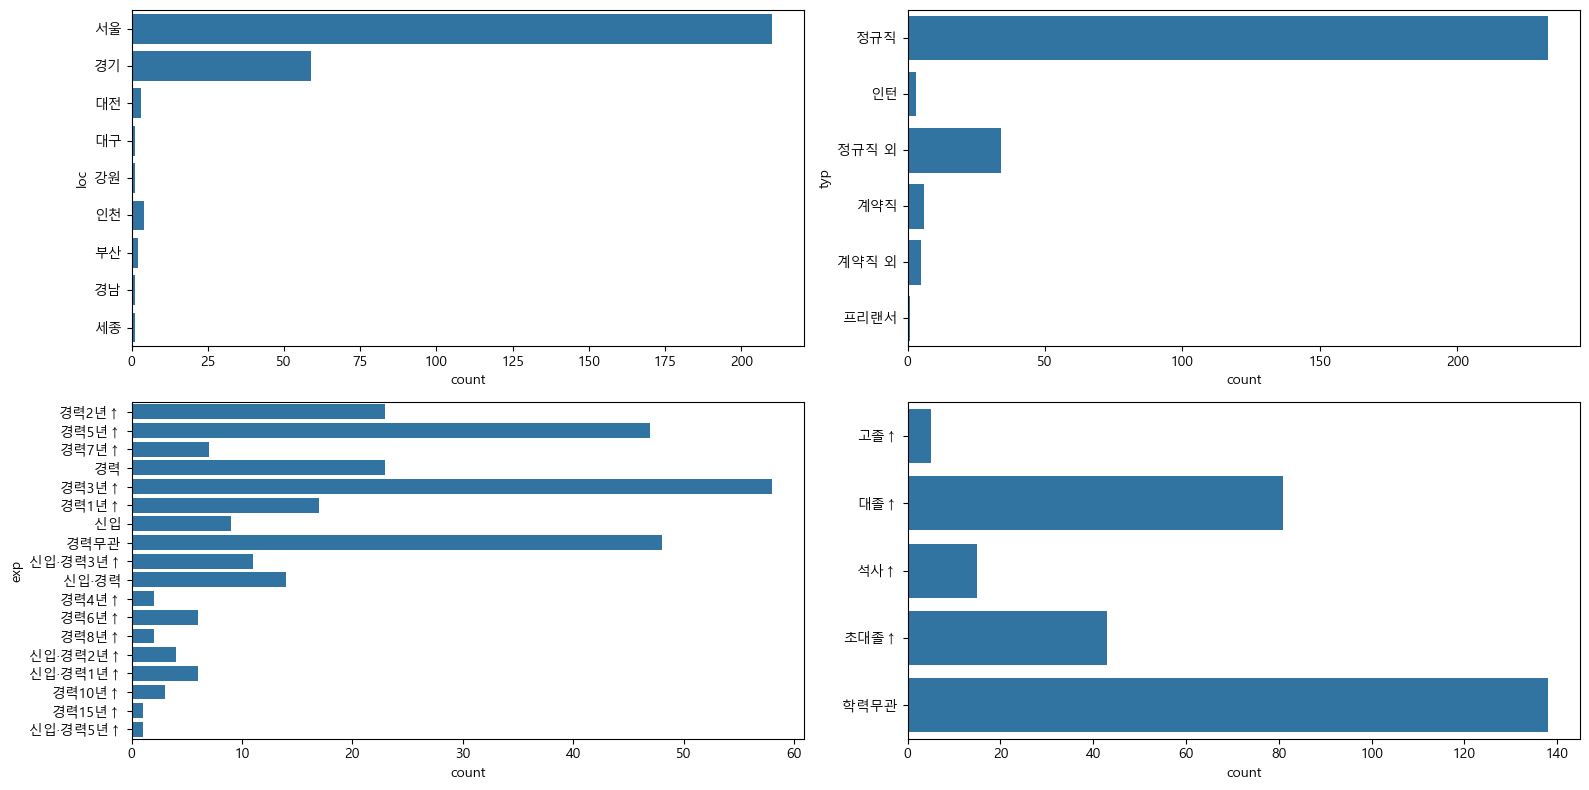

In [54]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.countplot(jobkorea['loc'])

plt.subplot(2, 2, 2)
sns.countplot(jobkorea['typ'])

plt.subplot(2, 2, 3)
sns.countplot(jobkorea['exp'])

plt.subplot(2, 2, 4)
sns.countplot(sorted(jobkorea['edu']))

plt.tight_layout()
plt.show()

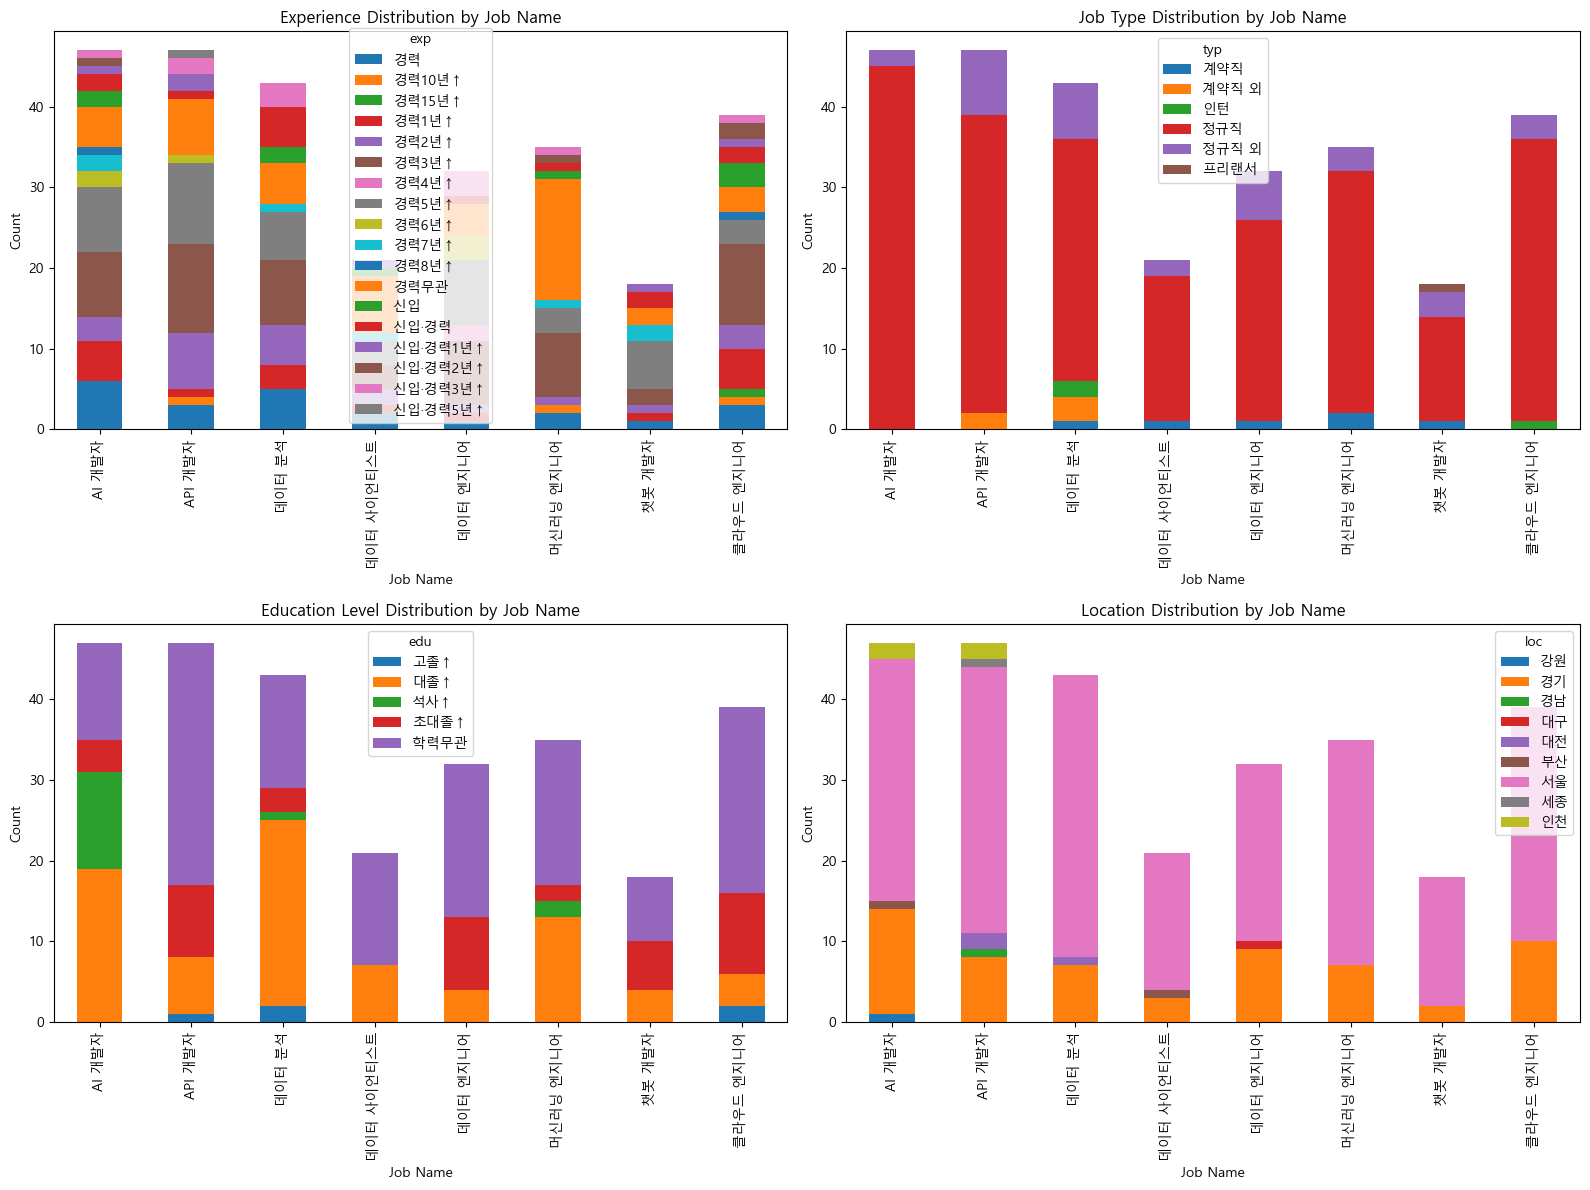

In [52]:
plt.figure(figsize=(16, 12))

# 1. Job Name 별 지역(loc) 분포
plt.subplot(2, 2, 4)
loc_dist = jobkorea.groupby('job_name')['loc'].value_counts().unstack().fillna(0)
loc_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Location Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

# 2. Job Name 별 직업 유형(typ) 분포
plt.subplot(2, 2, 2)
typ_dist = jobkorea.groupby('job_name')['typ'].value_counts().unstack().fillna(0)
typ_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Job Type Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

# 3. Job Name 별 경험(exp) 분포
plt.subplot(2, 2, 1)
exp_dist = jobkorea.groupby('job_name')['exp'].value_counts().unstack().fillna(0)
exp_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Experience Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

# 4. Job Name 별 교육 수준(edu) 분포
plt.subplot(2, 2, 3)
edu_dist = jobkorea.groupby('job_name')['edu'].value_counts().unstack().fillna(0)
edu_dist.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Education Level Distribution by Job Name')
plt.xlabel('Job Name')
plt.ylabel('Count')

plt.tight_layout()
plt.show()
